<!--
模板使用方法：将此代码块转为Markdown块然后点击左侧三角渲染（依赖 jupyter-wysiwyg ）
模板参数说明：将超链接的路径替换即可
@hyperlink_1: href="https://github.com/{组织或用户}/{仓库}/blob/{分支}/{目录和文件名组成的路径}"
@hyperlink_2: href="https://nbviewer.org/github/{组织或用户}/{仓库}/blob/{分支}/{目录和文件名组成的路径}"
注意事项：在 <p>...</p> 中添加注释或者空行等行为会破坏渲染效果
-->

<!-- start of template header -->
<p>
<div style="display:flex">
<a alt="hyperlink_1" title="在Github查看当前文件" href="https://github.com/Soltus/learn-python-BI/blob/main/lesson2/%E4%BD%9C%E4%B8%9A/4/index.ipynb" target="_blank"><img src="https://img.shields.io/badge/File-black?logo=github" style="height: 38px"/></a>
<span style="width:5.8px"></span>
<a alt="hyperlink_2" title="在nbviewer查看当前文件" href="https://nbviewer.org/github/Soltus/learn-python-BI/blob/main/lesson2/%E4%BD%9C%E4%B8%9A/4/index.ipynb" target="_blank"><img src="https://img.shields.io/badge/nbviewer-white?logo=jupyter" style="height: 38px"/></a>
</div>
</p>

<!-- 避免二次渲染当前块 -->
<!-- 请勿在此处添加内容 -->
<!-- end of template header -->

<h1><span style="color: #b96ad9;">题一</span></h1>
<blockquote>
<p>运用作业一的淘系生鲜品销售大数据，借鉴连衣裙案例分析方法，分析某商品 线上销售影响因素</p>
</blockquote>

<h2>（1）加载预处理后的数据</h2>

In [151]:
# 读取数据
df = pd.read_csv('../1/save_data2.csv')
df

,ID,品类,商品名,品牌,店铺名,经济体,省份,地级市,原价,快递费,...,累计评价 4,信誉 4,活动价 5,月销量 5,累计评价 5,信誉 5,活动价 6,月销量 6,累计评价 6,信誉 6
0,558596846348,蛋,鸽蛋,亿嘉,ecde08c9e65779b6,中国大陆,湖北,孝感,112.86,0.0,...,69.0,1239.0,69.00,33.0,72.0,1247.0,69.00,20.0,72.0,1260.0
1,531664242111,蛋,其他,other/其他,e25da776fa2f0726,中国大陆,浙江,嘉兴,45.68,0.0,...,257.0,2704.0,45.68,104.0,201.0,2759.0,45.68,94.0,171.0,2800.0
2,576710529109,蛋,柴鸡蛋,初晓,ccba4eec3fdff6da,中国大陆,安徽,宣城,98.00,0.0,...,1214.0,-1.0,69.80,1346.0,1548.0,-1.0,69.80,1131.0,1825.0,-1.0
3,548104662762,蛋,咸鸭蛋,百百阳,0e84d4953d5a816a,中国大陆,广西,南宁,118.00,0.0,...,1676.0,-1.0,59.80,549.0,1768.0,-1.0,59.80,451.0,1803.0,-1.0
4,563546480661,蛋,鸟蛋,金必得,e339d3da3c0db9f9,中国大陆,山东,临沂,69.00,0.0,...,6949.0,-1.0,26.90,3960.0,8125.0,-1.0,26.60,2791.0,9086.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9560,42654332642,水果,椰子,SUHO WHOLE FOODS/苏洪鲜食,32fa2a1855f24b26,泰国,非中国大陆,非中国大陆,82.00,0.0,...,6347.0,-1.0,89.00,1737.0,6895.0,-1.0,89.00,831.0,7159.0,-1.0
9561,565973303002,水果,香梨,LAIYANG PEAR/莱阳梨,2b9b4fb87b0336f8,中国大陆,山东,烟台,39.00,0.0,...,185.0,-1.0,29.80,151.0,219.0,-1.0,29.80,98.0,241.0,-1.0
9562,580245163878,水果,番石榴,世纪村,d409413ea2111090,中国大陆,福建,漳州,68.00,0.0,...,1107.0,-1.0,24.80,377.0,1255.0,-1.0,24.80,223.0,1326.0,-1.0
9563,544935851035,水果,柑橘,石门柑橘,e9a1c946660f5d0a,中国大陆,湖南,常德,31.80,0.0,...,755.0,800.0,45.80,0.0,692.0,800.0,45.80,0.0,411.0,800.0


<h2>（2）选定分析商品</h2>

<p><span style="font-size: 14pt;">数据量太少不利于分析，因此首先选出数据量前十的商品：</span></p>

In [152]:
# 获取数据量前十的商品
df["商品名"].value_counts().head(10)

商品名
腊肉     649
鸡蛋     639
牛肉     584
肉松     499
牛肉干    499
其他     457
猪肉     443
咸鸭蛋    321
牦牛肉    273
咸蛋     220
Name: count, dtype: int64

<p><span style="font-size: 14pt;">因为个人爱吃鸡蛋，因此决定选择鸡蛋作为分析商品</span></p>
<p><span style="font-size: 14pt;">大概查看鸡蛋的各项数据分布：</span></p>

In [153]:
egg_data = df[df["商品名"]=="鸡蛋"]
egg_data

,ID,品类,商品名,品牌,店铺名,经济体,省份,地级市,原价,快递费,...,累计评价 4,信誉 4,活动价 5,月销量 5,累计评价 5,信誉 5,活动价 6,月销量 6,累计评价 6,信誉 6
7,575094782466,蛋,鸡蛋,凸农,3c27ed0298436553,中国大陆,安徽,安庆,58.00,0.0,...,3793.0,-1.0,50.80,472.0,3986.0,-1.0,48.80,254.0,4048.0,-1.0
12,527171041750,蛋,鸡蛋,SUNDAILYFARM/圣迪乐村,61e7b2602f4c4ad9,中国大陆,四川,绵阳,157.00,0.0,...,2148.0,-1.0,119.60,593.0,2281.0,-1.0,119.60,366.0,2363.0,-1.0
14,567934433075,蛋,鸡蛋,誉福园,e24f5a9bbb8f55ed,中国大陆,湖北,宜昌,89.00,0.0,...,8376.0,-1.0,39.90,7979.0,10433.0,-1.0,39.90,344.0,10656.0,-1.0
21,527209018722,蛋,鸡蛋,黑垚,6ff2bb63e6276a1a,中国大陆,陕西,西安,99.00,0.0,...,1162.0,22105.0,99.00,246.0,1276.0,22735.0,99.00,188.0,1304.0,23362.0
22,545705948649,蛋,鸡蛋,一点缘,d1731a1886c51640,中国大陆,江苏,连云港,75.00,0.0,...,3155.0,196163.0,35.90,717.0,3091.0,204547.0,34.90,659.0,3083.0,217855.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,579015186973,蛋,鸡蛋,other/其他,93f2ed877c1e371e,中国大陆,湖北,十堰,88.00,0.0,...,4.0,60.0,88.80,0.0,4.0,60.0,88.80,0.0,2.0,60.0
1824,533098992149,蛋,鸡蛋,杨生记,9aeae9150dc2b0e2,中国大陆,江苏,常熟,30.00,5.0,...,9967.0,-1.0,30.00,597.0,7819.0,-1.0,30.00,132.0,6140.0,-1.0
1825,541137101007,蛋,鸡蛋,乡巴佬,2e3cb967c6da9f41,中国大陆,浙江,温州,0.93,5.0,...,111.0,31018.0,0.33,287.0,121.0,31577.0,0.33,212.0,134.0,31999.0
1828,16208737000,蛋,鸡蛋,劳山村,77ddbef9dcb5a5e0,中国大陆,陕西,延安,2.50,8.0,...,12.0,42203.0,2.30,0.0,11.0,43007.0,2.30,0.0,11.0,43754.0


In [154]:
egg_data["品牌"].value_counts().head(10)

品牌
other/其他             53
伊势                   13
SUNDAILYFARM/圣迪乐村    12
一点缘                  12
信得幸福农场               12
田园居                  12
88                   10
草鸡蛋                   8
自家                    8
戴记徽尚坊                 8
Name: count, dtype: int64

In [155]:
egg_data["省份"].value_counts().head(10)

省份
安徽    116
江苏     97
湖北     63
山东     61
四川     47
广东     42
浙江     32
河南     31
辽宁     27
陕西     20
Name: count, dtype: int64

In [156]:
egg_data["店铺名"].value_counts().head(10)

店铺名
61e7b2602f4c4ad9    12
a6321339d2242271    11
5d33ee8ac77a2615    10
9aeae9150dc2b0e2    10
d1731a1886c51640     8
179b0eda90f4605e     8
80d01b0b79818999     7
de86d5185d61cbb9     7
1aa3df3ab742d415     6
f7af0f365d989c93     6
Name: count, dtype: int64

<p><span style="font-size: 14pt;">最终确定将鸡蛋作为分析商品</span></p>

<h2>（3）数据预处理</h2>

<p><span style="font-size: 14pt;">第一次作业预处理后的数据丢弃了标题、基本信息等列，因此需要重新对原始数据进行数据预处理，方便下面的数据分析</span></p>

<h3><span style="font-size: 14pt;">定义自用的中文分词类（基于雷结巴）</span></h3>

In [157]:
import jieba
import warnings, os
from collections import Counter

class ChineseSegmentation:
    ''' base on Leijieba '''
    stopwords = []

    def __init__(self, sentence, stopword_file_path='', user_dict_file_path='', debug=False):
        ''''''
        self.sentence = sentence
        self.debug = debug

        if stopword_file_path != '':
            self.stopwords = [line.strip() for line in open(stopword_file_path, encoding='UTF-8').readlines()]
        else:
            warnings.warn('丫的 stopword_file_path 为空')

        if user_dict_file_path != '':
            jieba.load_userdict(user_dict_file_path)
        else:
            warnings.warn('丫的 user_dict_file_path 为空')

    def _fn_cut_words(self):
        ''''''
        if os.name == 'posix':  # 在 POSIX 系统上启用并行分词加速
            jieba.enable_parallel()
        seg_list = jieba.cut(self.sentence, cut_all=False)
        if self.stopwords:
            output_words = []
            for word in seg_list:
                word = word.strip()
                if word and word not in self.stopwords:
                    output_words.append(word)
        else:
            output_words = list(seg_list)

        return output_words


    def word_frequency(self, chunk_size=2000):
        ''''''
        word_list = self._fn_cut_words()
        word_dict = {}
        for word in word_list:
            if word not in word_dict:
                word_dict[word] = 1
            else:
                word_dict[word] += 1
        return sorted(word_dict.items(), key=lambda e:e[1], reverse=True)


    def cut_words_filter(self, frequency_threshold=0, remove_single_word=False):
        '''
        因为只有出现频率大于frequency_threshold的单词才会被保留下来
        如果remove_single_word被设置为True，则单个字符的单词将始终被过滤掉
        优化了数据量大时异常耗时问题，执行速度大幅提升
        '''
        word_list = self._fn_cut_words()
        word_counter = Counter(word_list)
        removed_list = []

        # 对词频进行排序
        word_dict_sorted = dict(sorted(word_counter.items(), key=lambda e: e[1], reverse=True))

        if remove_single_word:
            # 移除单个字符的词语和低频词语
            filtered_word_list = [word for word in word_list if len(word) > 1 and word_dict_sorted[word] > frequency_threshold]
            removed_list = [word for word in word_list if len(word) == 1 or word_dict_sorted[word] <= frequency_threshold]
        else:
            # 仅移除低频词语
            filtered_word_list = [word for word in word_list if word_dict_sorted[word] > frequency_threshold]
            removed_list = [word for word in word_list if word_dict_sorted[word] <= frequency_threshold]


        if self.debug:
            removed_list_len = len(removed_list)
            if 0 < removed_list_len < 50:
                warnings.warn(f'\t removed_list from filtered_word_list : ( {removed_list_len} ) \n {removed_list} ')
            elif 50 < removed_list_len:
                warnings.warn(f'\t removed_list from filtered_word_list : ( {removed_list_len} ) \n {removed_list[:20]} \n ... \n {removed_list[-20:]} ')

            print('-'*10)

            filtered_word_list_len = len(filtered_word_list)
            if 0 < filtered_word_list_len < 100:
                print(f'\t filtered_word_list : ( {filtered_word_list_len} ) \n {filtered_word_list} ')
            elif 100 < filtered_word_list_len:
                print(f'\t filtered_word_list : ( {filtered_word_list_len} ) \n {filtered_word_list[:40]} \n ... \n {filtered_word_list[-40:]} ')


        return filtered_word_list


In [158]:
data_all = pd.read_csv('../data/1.1/data.csv') # data.csv 合并了六次采集的原始数据，并进行了初步的数据预处理
data_all

,ID,品类,标题,店铺名,原价,快递费,快递地区,基本信息,是否天猫,活动价1,...,月销量4,信誉4,活动价5,累计评价5,月销量5,信誉5,活动价6,累计评价6,月销量6,信誉6
0,567797118294,蛋,[山客自养] 绿色有机土鸡蛋 农村散养 20枚装 破蛋包赔,267f241390522d93,56.2,12.0,吉林,包装方式：食用农产品||产地：中国大陆||省份：吉林省||城市：吉林市||枚数：20枚||净...,0,56.2,...,0.0,928.0,56.2,4.0,0.0,938.0,56.2,0.0,0.0,939.0
1,554095491655,蛋,超大蛋3斤鸵鸟蛋新鲜送礼土豪蛋自家养殖破损包赔,d32a9408880d6d3b,175.0,0.0,山东 淄博,包装方式：食用农产品||生鲜储存温度：0-8℃||产地：中国大陆||省份：山东省||城市：淄...,0,178.0,...,59.0,9340.0,155.0,232.0,109.0,9541.0,135.0,205.0,158.0,9919.0
2,550183128850,蛋,天飨村 咕叽咕叽农家散养新鲜纯天然30枚 粉壳土鸡蛋,891d50a4b916c106,55.0,0.0,湖南 长沙,包装方式：食用农产品||同城服务：同城24小时卖家送货上门||售卖方式：组合||是否为有机食...,0,55.0,...,2.0,2383.0,55.0,14.0,1.0,2385.0,55.0,12.0,0.0,2385.0
3,569390163639,蛋,正宗农村农家野外散养土鸡蛋 新鲜草鸡蛋柴笨鸡蛋 富硒土鸡蛋30枚,7a6d2e534db34688,43.8,0.0,安徽 安庆,净含量：1350g||包装方式：食用农产品||枚数：30枚||产地：中国大陆||省份：安徽省...,0,43.8,...,6.0,13759.0,43.8,76.0,5.0,13770.0,43.8,42.0,1.0,13776.0
4,572170484146,蛋,野外散养土鸡蛋农家散养树林柴鸡蛋农村草鸡蛋新鲜当日鸡蛋30枚装,b4c281826b800e11,79.0,0.0,安徽 宣城,包装方式：食用农产品||产地：中国大陆||省份：安徽省||城市：宣城市||枚数：30枚||净...,0,39.5,...,0.0,12088.0,39.5,2.0,0.0,13200.0,39.5,2.0,0.0,15004.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18894,554122150495,水果,鲜故事 圣女果小黄瓜5斤混装小番茄新鲜樱桃西红柿水果黄瓜小柿子,c5b1541973c2e732,42.0,0.0,山东 潍坊,生产日期：2017年06月23日 至 2017年06月25日||产地：中国大陆||省份：山东...,1,39.8,...,2283.0,-1.0,39.8,13094.0,7153.0,-1.0,39.8,15146.0,6182.0,-1.0
18895,565973303002,水果,山东特产莱阳梨当季新鲜时令水果香梨子 烟台贡梨慈梨5斤整箱包邮,2b9b4fb87b0336f8,39.0,0.0,山东 烟台,生产日期：2018年09月21日 至 2018年09月23日||品牌：LAIYANG PEA...,1,26.8,...,129.0,-1.0,29.8,219.0,151.0,-1.0,29.8,241.0,98.0,-1.0
18896,580245163878,水果,福建番石榴红心芭乐果混装5斤新鲜水果白心巴乐包邮蕃石榴潘石榴,d409413ea2111090,68.0,0.0,福建 漳州,生产日期：2018年10月19日 至 2018年10月19日||品牌：世纪村||系列：芭乐|...,1,22.8,...,438.0,-1.0,24.8,1255.0,377.0,-1.0,24.8,1326.0,223.0,-1.0
18897,544935851035,水果,10斤包邮正宗湖南常德石门秀萍柑橘橘子桔子现摘早熟新鲜皮薄蜜桔,e9a1c946660f5d0a,31.8,0.0,湖南 常德,包装方式：食用农产品||水果种类：其他||产地：中国大陆||省份：湖南省||城市：常德市||...,0,34.8,...,0.0,800.0,45.8,692.0,0.0,800.0,45.8,411.0,0.0,800.0


<h3><span style="font-size: 14pt;">检查空值</span></h3>

In [159]:
data_all.isnull().sum()

ID       0
品类       0
标题       0
店铺名      0
原价       0
快递费      0
快递地区     0
基本信息     0
是否天猫     0
活动价1     0
累计评价1    0
月销量1     0
信誉1      0
活动价2     0
累计评价2    0
月销量2     0
信誉2      0
活动价3     0
累计评价3    0
月销量3     0
信誉3      0
活动价4     0
累计评价4    0
月销量4     0
信誉4      0
活动价5     0
累计评价5    0
月销量5     0
信誉5      0
活动价6     0
累计评价6    0
月销量6     0
信誉6      0
dtype: int64

<h3>属性提取</h3>

<h4>商品名提取</h4>

In [160]:
data_all['商品名'] = '其他'
productName = pd.read_csv('../data/1.1/蛋名称.txt', header=None)
productNameList1 = productName[0].tolist()
productName = pd.read_csv('../data/1.1/肉名称.txt', header=None)
productNameList2 = productName[0].tolist()
productName = pd.read_csv('../data/1.1/蔬菜名称.txt', header=None)
productNameList3 = productName[0].tolist()
productName = pd.read_csv('../data/1.1/水产名称.txt', header=None)
productNameList4 = productName[0].tolist()
productName = pd.read_csv('../data/1.1/水果名称.txt', header=None)
productNameList5 = productName[0].tolist()
for j in range(len(data_all)):
    if data_all['品类'][j] == '蛋':
        m = ChineseSegmentation(data_all['标题'][j], '../data/1.1/stopwords.txt',
                 '../data/1.1/蛋名称.txt')
        productNameList = productNameList1
    elif data_all['品类'][j] == '肉':
        m = ChineseSegmentation(data_all['标题'][j], '../data/1.1/stopwords.txt',
                 '../data/1.1/肉名称.txt')
        productNameList = productNameList2
    elif data_all['品类'][j] == '蔬菜':
        m = ChineseSegmentation(data_all['标题'][j], '../data/1.1/stopwords.txt',
                 '../data/1.1/蔬菜名称.txt')
        productNameList = productNameList3
    elif data_all['品类'][j] == '水产':
        m = ChineseSegmentation(data_all['标题'][j], '../data/1.1/stopwords.txt',
                 '../data/1.1/水产名称.txt')
        productNameList = productNameList4
    elif data_all['品类'][j] == '水果':
        m = ChineseSegmentation(data_all['标题'][j], '../data/1.1/stopwords.txt',
                 '../data/1.1/水果名称.txt')
        productNameList = productNameList5

    T = list(set(m._fn_cut_words()))
    for i in T:
        if i in productNameList:
            data_all.loc[j, '商品名'] = i
            break

data_all["商品名"].value_counts().head(10)

商品名
鸡蛋     1843
其他     1004
牛肉干     780
牛肉      716
咸鸭蛋     603
肉松      513
柴鸡蛋     510
腊肉      375
牡蛎      348
鲍鱼      314
Name: count, dtype: int64

<h4>产地提取</h4>

In [161]:
import re

data_all['经济体'] = '其他'
data_all['省份'] = '其他'
data_all['地级市'] = '其他'

pattern1 = re.compile('产地：(.+?)\|\|')
pattern2 = re.compile('省份：(.+?)\|\|')
pattern3 = re.compile('城市：(.+?)\|\|')

data_all[['经济体', '省份', '地级市']] = data_all['基本信息'].str.extract(pattern1).join(
    data_all['基本信息'].str.extract(pattern2), rsuffix='_right').join(
    data_all['基本信息'].str.extract(pattern3), rsuffix='_right')

data_all.fillna('', inplace=True)

# 对“经济体”为“中国大陆”且“地级市”没有赋值的，用“快递地区”填充
for i in range(len(data_all)):
    if data_all['经济体'][i]=='中国大陆' and data_all['地级市'][i]=='':
        tmp = data_all['快递地区'][i].split(' ')
        if len(tmp)==2:
            data_all.loc[i, '省份'] = tmp[0]
            data_all.loc[i, '地级市'] = tmp[1]

# 去掉省市名中的“省”“市”
# data_all['省份'] = data_all.省份.str.replace('省','')
# data_all['地级市'] = data_all.地级市.str.replace('市','')

data_all

,ID,品类,标题,店铺名,原价,快递费,快递地区,基本信息,是否天猫,活动价1,...,月销量5,信誉5,活动价6,累计评价6,月销量6,信誉6,商品名,经济体,省份,地级市
0,567797118294,蛋,[山客自养] 绿色有机土鸡蛋 农村散养 20枚装 破蛋包赔,267f241390522d93,56.2,12.0,吉林,包装方式：食用农产品||产地：中国大陆||省份：吉林省||城市：吉林市||枚数：20枚||净...,0,56.2,...,0.0,938.0,56.2,0.0,0.0,939.0,鸡蛋,中国大陆,吉林省,吉林市
1,554095491655,蛋,超大蛋3斤鸵鸟蛋新鲜送礼土豪蛋自家养殖破损包赔,d32a9408880d6d3b,175.0,0.0,山东 淄博,包装方式：食用农产品||生鲜储存温度：0-8℃||产地：中国大陆||省份：山东省||城市：淄...,0,178.0,...,109.0,9541.0,135.0,205.0,158.0,9919.0,鸵鸟蛋,中国大陆,山东省,淄博市
2,550183128850,蛋,天飨村 咕叽咕叽农家散养新鲜纯天然30枚 粉壳土鸡蛋,891d50a4b916c106,55.0,0.0,湖南 长沙,包装方式：食用农产品||同城服务：同城24小时卖家送货上门||售卖方式：组合||是否为有机食...,0,55.0,...,1.0,2385.0,55.0,12.0,0.0,2385.0,鸡蛋,中国大陆,湖南省,长沙市
3,569390163639,蛋,正宗农村农家野外散养土鸡蛋 新鲜草鸡蛋柴笨鸡蛋 富硒土鸡蛋30枚,7a6d2e534db34688,43.8,0.0,安徽 安庆,净含量：1350g||包装方式：食用农产品||枚数：30枚||产地：中国大陆||省份：安徽省...,0,43.8,...,5.0,13770.0,43.8,42.0,1.0,13776.0,鸡蛋,中国大陆,安徽省,安庆市
4,572170484146,蛋,野外散养土鸡蛋农家散养树林柴鸡蛋农村草鸡蛋新鲜当日鸡蛋30枚装,b4c281826b800e11,79.0,0.0,安徽 宣城,包装方式：食用农产品||产地：中国大陆||省份：安徽省||城市：宣城市||枚数：30枚||净...,0,39.5,...,0.0,13200.0,39.5,2.0,0.0,15004.0,柴鸡蛋,中国大陆,安徽省,宣城市
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18894,554122150495,水果,鲜故事 圣女果小黄瓜5斤混装小番茄新鲜樱桃西红柿水果黄瓜小柿子,c5b1541973c2e732,42.0,0.0,山东 潍坊,生产日期：2017年06月23日 至 2017年06月25日||产地：中国大陆||省份：山东...,1,39.8,...,7153.0,-1.0,39.8,15146.0,6182.0,-1.0,柿子,中国大陆,山东,潍坊
18895,565973303002,水果,山东特产莱阳梨当季新鲜时令水果香梨子 烟台贡梨慈梨5斤整箱包邮,2b9b4fb87b0336f8,39.0,0.0,山东 烟台,生产日期：2018年09月21日 至 2018年09月23日||品牌：LAIYANG PEA...,1,26.8,...,151.0,-1.0,29.8,241.0,98.0,-1.0,梨,中国大陆,山东省,烟台市
18896,580245163878,水果,福建番石榴红心芭乐果混装5斤新鲜水果白心巴乐包邮蕃石榴潘石榴,d409413ea2111090,68.0,0.0,福建 漳州,生产日期：2018年10月19日 至 2018年10月19日||品牌：世纪村||系列：芭乐|...,1,22.8,...,377.0,-1.0,24.8,1326.0,223.0,-1.0,番石榴,中国大陆,福建省,漳州市
18897,544935851035,水果,10斤包邮正宗湖南常德石门秀萍柑橘橘子桔子现摘早熟新鲜皮薄蜜桔,e9a1c946660f5d0a,31.8,0.0,湖南 常德,包装方式：食用农产品||水果种类：其他||产地：中国大陆||省份：湖南省||城市：常德市||...,0,34.8,...,0.0,800.0,45.8,411.0,0.0,800.0,桔子,中国大陆,湖南省,常德市


In [162]:
set(data_all['经济体'].values.tolist())

{'',
 '东北地区',
 '中国',
 '中国大陆',
 '中国大陆地区',
 '丹麦',
 '以色列',
 '俄罗斯',
 '兴化',
 '其他',
 '其他/other',
 '其它国家',
 '加拿大',
 '南非',
 '印尼',
 '厄瓜多尔',
 '古巴',
 '塞内加尔',
 '墨西哥',
 '太湖',
 '山东省',
 '德国',
 '挪威',
 '斯里兰卡',
 '新加坡',
 '新西兰',
 '日本',
 '智利',
 '江苏省',
 '江西省',
 '沙特阿拉伯',
 '法国',
 '泰国',
 '浙江省',
 '海南省',
 '港澳台',
 '港澳台地区',
 '湖北省',
 '澳大利亚',
 '福建省',
 '缅甸',
 '美国',
 '英国',
 '菲律宾',
 '越南',
 '辽宁省',
 '阳澄湖',
 '阿根廷',
 '韩国',
 '马来西亚'}

In [163]:
data_all['经济体'] = data_all['经济体'].replace('', '其他')
data_all.loc[data_all['经济体'] == '其他/other', '经济体'] = '其他'
data_all.loc[data_all['经济体'] == '其它国家', '经济体'] = '其他'
data_all.loc[data_all['经济体'] == '东北地区','经济体'] = '中国大陆'
data_all.loc[data_all['经济体'] == '中国','经济体'] = '中国大陆'
data_all.loc[data_all['经济体'] == '中国大陆地区','经济体'] = '中国大陆'
data_all.loc[data_all['经济体'] == '兴化','经济体'] = '中国大陆'
data_all.loc[data_all['经济体'] == '太湖','经济体'] = '中国大陆'
data_all.loc[data_all['经济体'] == '阳澄湖','经济体'] = '中国大陆'
data_all.loc[data_all['经济体'] == '港澳台地区', '经济体'] = '港澳台'
china_provinces = ['北京市', '天津市', '河北省', '山西省', '内蒙古自治区', '辽宁省', '吉林省', '黑龙江省', '上海市', '江苏省', '浙江省', '安徽省', '福建省', '江西省', '山东省', '河南省', '湖北省', '湖南省', '广东省', '广西壮族自治区', '海南省', '重庆市', '四川省', '贵州省', '云南省', '西藏自治区', '陕西省', '甘肃省', '青海省', '宁夏回族自治区', '新疆维吾尔自治区']
for i in china_provinces:
    data_all.loc[data_all['经济体'] == i,'经济体'] = '中国大陆'

data_all.loc[data_all['经济体'] != '中国大陆', '省份'] = '非中国大陆'
data_all.loc[data_all['经济体'] != '中国大陆', '地级市'] = '非中国大陆'
set(data_all['经济体'].values.tolist())

{'中国大陆',
 '丹麦',
 '以色列',
 '俄罗斯',
 '其他',
 '加拿大',
 '南非',
 '印尼',
 '厄瓜多尔',
 '古巴',
 '塞内加尔',
 '墨西哥',
 '德国',
 '挪威',
 '斯里兰卡',
 '新加坡',
 '新西兰',
 '日本',
 '智利',
 '沙特阿拉伯',
 '法国',
 '泰国',
 '港澳台',
 '澳大利亚',
 '缅甸',
 '美国',
 '英国',
 '菲律宾',
 '越南',
 '阿根廷',
 '韩国',
 '马来西亚'}

In [164]:
set(data_all['省份'].values.tolist())

{'',
 '上海',
 '上海市',
 '中国大陆',
 '云南',
 '云南省',
 '其他',
 '其它国家',
 '内蒙古自治区',
 '北京',
 '北京市',
 '吉林',
 '吉林省',
 '四川',
 '四川省',
 '天津',
 '天津市',
 '宁夏回族自治区',
 '安徽',
 '安徽省',
 '山东',
 '山东省',
 '山西',
 '山西省',
 '广东',
 '广东省',
 '广西',
 '广西壮族自治区',
 '新疆',
 '新疆维吾尔族自治区',
 '江苏',
 '江苏省',
 '江西',
 '江西省',
 '河北',
 '河北省',
 '河南',
 '河南省',
 '浙江',
 '浙江省',
 '海南',
 '海南省',
 '港澳台',
 '湖北',
 '湖北省',
 '湖南',
 '湖南省',
 '甘肃',
 '甘肃省',
 '福建',
 '福建省',
 '西藏自治区',
 '贵州',
 '贵州省',
 '辽宁',
 '辽宁省',
 '重庆',
 '重庆市',
 '陕西',
 '陕西省',
 '青海省',
 '非中国大陆',
 '黑龙江',
 '黑龙江省'}

In [165]:
data_all['省份'] = data_all['省份'].replace('', '其他')
data_all.loc[data_all['省份'] == '港澳台', '省份'] = '非中国大陆'
data_all.loc[data_all['省份'] == '其它国家', '省份'] = '非中国大陆'
data_all.loc[data_all['省份'] == '中国大陆', '省份'] = '其他'

all_regions = set(data_all['省份'].values.tolist())
filtered_regions = {region for region in all_regions if not region.endswith(('省', '市', '自治区', '非中国大陆'))}

for r in filtered_regions:
    for p in china_provinces:
        if p.startswith(r):
            data_all.loc[data_all['省份'] == r, '省份'] = p

set(data_all['省份'].values.tolist())

{'上海市',
 '云南省',
 '其他',
 '内蒙古自治区',
 '北京市',
 '吉林省',
 '四川省',
 '天津市',
 '宁夏回族自治区',
 '安徽省',
 '山东省',
 '山西省',
 '广东省',
 '广西壮族自治区',
 '新疆维吾尔族自治区',
 '新疆维吾尔自治区',
 '江苏省',
 '江西省',
 '河北省',
 '河南省',
 '浙江省',
 '海南省',
 '湖北省',
 '湖南省',
 '甘肃省',
 '福建省',
 '西藏自治区',
 '贵州省',
 '辽宁省',
 '重庆市',
 '陕西省',
 '青海省',
 '非中国大陆',
 '黑龙江省'}

In [175]:
data_all['地级市'] = data_all['地级市'].replace('', '其他')

# 将 XX市 和 XX 并存的 XX市 修改为 XX
all_regions = set(data_all['地级市'].values.tolist())
filtered_regions_in = {region for region in all_regions if region.endswith(('市', '自治州', '自治县', '地区'))}
filtered_regions_out = {region for region in all_regions if not region.endswith(('市', '自治州', '自治县', '地区'))}

for short in filtered_regions_out:
    for long in filtered_regions_in:
        if long.startswith(short):
            data_all.loc[data_all['地级市'] == long,'地级市'] = short

# 二次处理，将单独的 XX市 修改为 XX
all_regions = set(data_all['地级市'].values.tolist())
filtered_regions_in = {region for region in all_regions if region.endswith(('市', '地区'))} # 自治地区规则复杂，不处理

for long in filtered_regions_in:
    if long.endswith("市"):
        short = long.replace("市", "")
    elif long.endswith("地区"):
        short = long.replace("地区", "")
    else:
        short = long
    data_all.loc[data_all['地级市'] == long,'地级市'] = short

print(set(data_all['地级市'].values.tolist()))

{'大理', '武穴', '宣城', '黄石', '荆门', '太仓', '保亭黎族苗族自治县', '陇南', '澄迈县', '鸡西', '仙桃', '襄阳', '辽阳', '嵊州', '肇庆', '衢州', '阿坝', '七台河', '黄岩区', '晋城', '朝阳', '海口', '锦州', '常州', '上饶', '长沙', '千岛湖', '惠州', '昆明', '漯河', '攀枝花', '宁德', '延边朝鲜族自治州', '河源', '盘锦', '徐州', '锡林郭勒盟', '鞍山', '资阳区', '银川', '武都区', '普洱', '内江', '拉萨', '镇江', '定西', '天门', '伊春', '辽源', '伊犁哈萨克自治州', '淮南', '济宁', '贵港', '平湖', '广州', '白山', '马尔康县', '文山壮族苗族自治州', '海盐县', '张家港', '大连', '四平', '临海', '许昌', '遂宁', '福安', '江山', '阿拉善盟', '丹东', '宜兴', '常德', '塔城', '巴中', '黔西南布依族苗族自治州', '恩施土家族苗族自治州', '自贡', '铁岭', '信阳', '非中国大陆', '万宁', '白沙黎族自治县', '金华', '齐齐哈尔', '启东', '威海', '其他', '忻州', '黔南布依族苗族自治州', '达州', '景德镇', '怀化', '连云港', '天水', '武汉', '温岭', '昆山', '绵阳', '伊宁', '邢台', '莱芜', '德阳', '嘉兴', '日照', '北海', '盐城', '石河子', '亳州', '沭阳县', '香格里拉县', '甘孜藏族自治州', '德宏傣族景颇族自治州', '赤峰', '洛阳', '文昌', '东营', '百色', '曲阜', '毕节', '抚顺', '北戴河区', '铜川', '岳阳', '都江堰', '乐山', '乌兰察布', '咸阳', '海西蒙古族藏族自治州', '邵阳', '温州', '聊城', '吉首', '宿州', '白城', '荆州', '黔东南苗族侗族自治州', '贵池区', '西昌', '固原', '舟山', '萍乡', '池州', '潮州', '铜仁', '郑州', '钦州', '松原', '林芝'

<h4>品牌提取</h4>

In [167]:
import re

data_all['品牌'] = data_all['基本信息'].str.extract('品牌：(\S+?)\|\|', expand=False).fillna('')
data_all['品牌'] = data_all['品牌'].replace('', '其他')
data_all['品牌'] = data_all['品牌'].replace('other/其他', '其他')

data_all['品牌'].value_counts().head(10)

品牌
其他               9020
甘福园                91
BE＆CHEERY/百草味      88
冠云                 83
味斯美                79
良品铺子               72
张飞                 62
来伊份                54
蜀道香                53
一番滋园               48
Name: count, dtype: int64

<h4>保存处理好的数据</h4>

In [170]:
egg_data = data_all[data_all["商品名"] == "鸡蛋"]
egg_data.to_csv('./save_data_egg.csv',header=True,index=False)

<h2>（4）词频统计</h2>

In [172]:
data = pd.read_csv('./save_data_egg.csv')

<h3>分词处理</h3>

In [174]:
allWords =''
for i in range(len(data)):
    allWords = allWords + ' '+ data['标题'][i] + ' '

m = ChineseSegmentation(allWords, '../data/1.1/stopwords.txt', '../data/1.1/蛋名称.txt')
wordNum = m.word_frequency()[:100]
print(wordNum)

[('鸡蛋', 4174), ('柴鸡蛋', 220), ('鸡', 101), ('种蛋', 85), ('土鸡', 73), ('蛋包', 69), ('生食', 65), ('柴笨', 60), ('虫草', 53), ('无菌', 45), ('谷物', 44), ('杂粮', 44), ('草鸡', 42), ('粮食', 41), ('土特产', 41), ('乌骨鸡', 40), ('苏北', 38), ('野山', 37), ('林下', 29), ('绿皮', 28), ('胚蛋', 27), ('山鸡', 26), ('安全', 25), ('跑', 25), ('激素', 25), ('柴鸡', 25), ('九华山', 24), ('大别山', 24), ('高', 22), ('乌鸡', 22), ('伊势', 21), ('无抗', 21), ('一盒', 21), ('捡', 21), ('日本', 21), ('麻酱', 21), ('皖南', 20), ('深山', 20), ('柴', 20), ('变蛋', 20), ('五谷', 19), ('纯粮', 19), ('添加', 19), ('毛蛋', 19), ('大山', 19), ('五谷杂粮', 19), ('竹林', 19), ('田园', 18), ('草柴', 18), ('散', 18), ('家', 18), ('柴草', 17), ('实发', 17), ('鲜蛋', 17), ('泰和', 17), ('蛋土', 17), ('当日', 17), ('实蛋', 17), ('溏', 16), ('蓟县', 16), ('兰皇', 15), ('产', 15), ('笨草', 15), ('老母', 15), ('品质', 15), ('荷包蛋', 14), ('老母鸡', 14), ('六合', 14), ('自产', 14), ('纯种', 14), ('皮蛋', 14), ('买一送一', 13), ('旺', 13), ('生吃', 13), ('天津', 13), ('林地', 13), ('保证', 13), ('抗生素', 12), ('OMG', 12), ('我迷家', 12), ('五黑鸡', 12), ('满月', 12), ('蛋草',

<h3>词频可视化与持久化</h3>

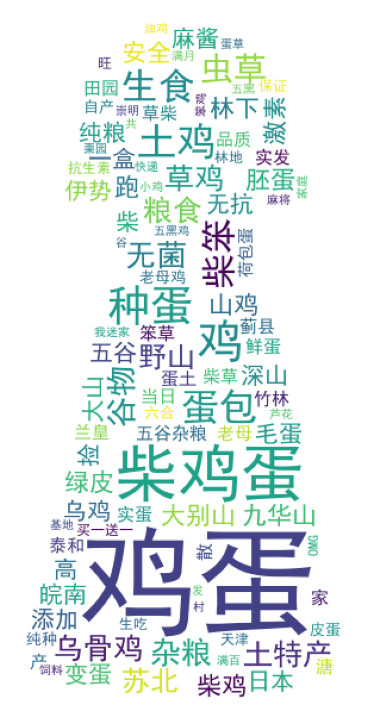

In [189]:
import numpy as np # numpy数据处理库
import wordcloud # 词云展示库
from PIL import Image # 图像处理库
import matplotlib.pyplot as plt # 图像展示库

# 词频展示
mask = np.array(Image.open('../data/4.1/wordcloud.png')) # 定义词频背景
wc = wordcloud.WordCloud(
    font_path='C:/Windows/Fonts/simhei.ttf', # 设置字体格式
    background_color="white",
    mask=mask, # 设置背景图
    max_words=200, # 最多显示词数
    max_font_size=100 # 字体最大值
)
words = dict(wordNum)
wc.generate_from_frequencies(words) # 从字典生成词云
image_colors = wordcloud.ImageColorGenerator(mask) # 从背景图建立颜色方案
plt.rcParams['figure.dpi'] = 186  # 修改dpi
plt.imshow(wc) # 显示词云
plt.axis('off') # 关闭坐标轴
plt.show() # 显示图像

In [190]:
name=['关键词','词频']
wordNum_pd = pd.DataFrame(columns=name,data=wordNum)
wordNum_pd.to_csv('./wordNum.csv',header=True,index=False)

<h2>（5）关键变量提取</h2>

In [208]:
data = pd.read_csv('./save_data_egg.csv')

In [206]:
wordNum = pd.read_csv('./wordNum.csv')
keyWord = []
for i in range(58):
    keyWord.append(wordNum['关键词'][i])
print(keyWord)

['鸡蛋', '柴鸡蛋', '鸡', '种蛋', '土鸡', '蛋包', '生食', '柴笨', '虫草', '无菌', '谷物', '杂粮', '草鸡', '粮食', '土特产', '乌骨鸡', '苏北', '野山', '林下', '绿皮', '胚蛋', '山鸡', '安全', '跑', '激素', '柴鸡', '九华山', '大别山', '高', '乌鸡', '伊势', '无抗', '一盒', '捡', '日本', '麻酱', '皖南', '深山', '柴', '变蛋', '五谷', '纯粮', '添加', '毛蛋', '大山', '五谷杂粮', '竹林', '田园', '草柴', '散', '家', '柴草', '实发', '鲜蛋', '泰和', '蛋土', '当日', '实蛋']


In [207]:
# 移除无意义的部分
for i in ['鸡蛋','鸡', '添加','实发']:
    keyWord.remove(i)
print(keyWord)

['柴鸡蛋', '种蛋', '土鸡', '蛋包', '生食', '柴笨', '虫草', '无菌', '谷物', '杂粮', '草鸡', '粮食', '土特产', '乌骨鸡', '苏北', '野山', '林下', '绿皮', '胚蛋', '山鸡', '安全', '跑', '激素', '柴鸡', '九华山', '大别山', '高', '乌鸡', '伊势', '无抗', '一盒', '捡', '日本', '麻酱', '皖南', '深山', '柴', '变蛋', '五谷', '纯粮', '毛蛋', '大山', '五谷杂粮', '竹林', '田园', '草柴', '散', '家', '柴草', '鲜蛋', '泰和', '蛋土', '当日', '实蛋']


In [209]:
for i in range(len(keyWord)):
    data[keyWord[i]] = 0
data

,ID,品类,标题,店铺名,原价,快递费,快递地区,基本信息,是否天猫,活动价1,...,田园,草柴,散,家,柴草,鲜蛋,泰和,蛋土,当日,实蛋
0,567797118294,蛋,[山客自养] 绿色有机土鸡蛋 农村散养 20枚装 破蛋包赔,267f241390522d93,56.2,12.0,吉林,包装方式：食用农产品||产地：中国大陆||省份：吉林省||城市：吉林市||枚数：20枚||净...,0,56.2,...,0,0,0,0,0,0,0,0,0,0
1,550183128850,蛋,天飨村 咕叽咕叽农家散养新鲜纯天然30枚 粉壳土鸡蛋,891d50a4b916c106,55.0,0.0,湖南 长沙,包装方式：食用农产品||同城服务：同城24小时卖家送货上门||售卖方式：组合||是否为有机食...,0,55.0,...,0,0,0,0,0,0,0,0,0,0
2,569390163639,蛋,正宗农村农家野外散养土鸡蛋 新鲜草鸡蛋柴笨鸡蛋 富硒土鸡蛋30枚,7a6d2e534db34688,43.8,0.0,安徽 安庆,净含量：1350g||包装方式：食用农产品||枚数：30枚||产地：中国大陆||省份：安徽省...,0,43.8,...,0,0,0,0,0,0,0,0,0,0
3,43843684710,蛋,【桃咏】桃园散养鸡蛋 30枚装,5608ff70ee6371f3,60.0,0.0,上海,生产日期：2016年09月12日 至 2016年09月13日||品牌：桃咏||系列：草鸡蛋|...,1,60.0,...,0,0,0,0,0,0,0,0,0,0
4,575660454813,蛋,千岛湖高山土鸡蛋30枚农家野外散养土鸡蛋,adee90c17b4122d8,60.0,5.0,浙江 杭州,包装方式：食用农产品||生鲜储存温度：25℃||产地：中国大陆||省份：浙江省||城市：千岛...,0,60.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1838,571689076455,蛋,绿壳鸡蛋50枚,18d393126d25ff84,60.0,0.0,河南 驻马店,包装方式：食用农产品||产地：中国大陆||省份：河南省||城市：驻马店市||枚数：50枚||...,0,60.0,...,0,0,0,0,0,0,0,0,0,0
1839,547229119359,蛋,特价农家黄泥【生咸鸡蛋 】 新鲜咸鸡蛋20枚 包邮 破损包赔,aecdde968ee65d09,28.8,0.0,河南 南阳,包装方式：食用农产品||生鲜储存温度：0-8℃||产地：中国大陆||省份：河南省||城市：南...,0,28.8,...,0,0,0,0,0,0,0,0,0,0
1840,577425733168,蛋,豆荚农庄 散养笨鸡蛋 柴鸡蛋50枚仅发京津 10月31日发货,be733a5d683163de,128.0,34.0,北京,产地：中国大陆||省份：北京||包装方式：食用农产品||净含量：2500g||枚数：50枚|...,0,128.0,...,0,0,0,0,0,0,0,0,0,0
1841,559742058079,蛋,七彩野鸡蛋60枚包邮包新鲜生态园直供,362ba37bc7588488,77.6,0.0,山东 潍坊,包装方式：食用农产品||产地：中国大陆||省份：山东省||城市：潍坊市||枚数：60枚||净...,0,77.6,...,0,0,0,0,0,0,0,0,0,0


In [211]:
for i in range(len(data)):
    for j in range(len(keyWord)):
        if (data['标题'][i].find(keyWord[j]) != -1):
            data.loc[i, keyWord[j]] = 1

data

,ID,品类,标题,店铺名,原价,快递费,快递地区,基本信息,是否天猫,活动价1,...,田园,草柴,散,家,柴草,鲜蛋,泰和,蛋土,当日,实蛋
0,567797118294,蛋,[山客自养] 绿色有机土鸡蛋 农村散养 20枚装 破蛋包赔,267f241390522d93,56.2,12.0,吉林,包装方式：食用农产品||产地：中国大陆||省份：吉林省||城市：吉林市||枚数：20枚||净...,0,56.2,...,0,0,1,0,0,0,0,0,0,0
1,550183128850,蛋,天飨村 咕叽咕叽农家散养新鲜纯天然30枚 粉壳土鸡蛋,891d50a4b916c106,55.0,0.0,湖南 长沙,包装方式：食用农产品||同城服务：同城24小时卖家送货上门||售卖方式：组合||是否为有机食...,0,55.0,...,0,0,1,1,0,0,0,0,0,0
2,569390163639,蛋,正宗农村农家野外散养土鸡蛋 新鲜草鸡蛋柴笨鸡蛋 富硒土鸡蛋30枚,7a6d2e534db34688,43.8,0.0,安徽 安庆,净含量：1350g||包装方式：食用农产品||枚数：30枚||产地：中国大陆||省份：安徽省...,0,43.8,...,0,0,1,1,0,0,0,0,0,0
3,43843684710,蛋,【桃咏】桃园散养鸡蛋 30枚装,5608ff70ee6371f3,60.0,0.0,上海,生产日期：2016年09月12日 至 2016年09月13日||品牌：桃咏||系列：草鸡蛋|...,1,60.0,...,0,0,1,0,0,0,0,0,0,0
4,575660454813,蛋,千岛湖高山土鸡蛋30枚农家野外散养土鸡蛋,adee90c17b4122d8,60.0,5.0,浙江 杭州,包装方式：食用农产品||生鲜储存温度：25℃||产地：中国大陆||省份：浙江省||城市：千岛...,0,60.0,...,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1838,571689076455,蛋,绿壳鸡蛋50枚,18d393126d25ff84,60.0,0.0,河南 驻马店,包装方式：食用农产品||产地：中国大陆||省份：河南省||城市：驻马店市||枚数：50枚||...,0,60.0,...,0,0,0,0,0,0,0,0,0,0
1839,547229119359,蛋,特价农家黄泥【生咸鸡蛋 】 新鲜咸鸡蛋20枚 包邮 破损包赔,aecdde968ee65d09,28.8,0.0,河南 南阳,包装方式：食用农产品||生鲜储存温度：0-8℃||产地：中国大陆||省份：河南省||城市：南...,0,28.8,...,0,0,0,1,0,0,0,0,0,0
1840,577425733168,蛋,豆荚农庄 散养笨鸡蛋 柴鸡蛋50枚仅发京津 10月31日发货,be733a5d683163de,128.0,34.0,北京,产地：中国大陆||省份：北京||包装方式：食用农产品||净含量：2500g||枚数：50枚|...,0,128.0,...,0,0,1,0,0,0,0,0,0,0
1841,559742058079,蛋,七彩野鸡蛋60枚包邮包新鲜生态园直供,362ba37bc7588488,77.6,0.0,山东 潍坊,包装方式：食用农产品||产地：中国大陆||省份：山东省||城市：潍坊市||枚数：60枚||净...,0,77.6,...,0,0,0,0,0,0,0,0,0,0


In [212]:
data.to_csv('./save_data_egg_kw.csv',header=True,index=False)

<h2>（6）描述性统计</h2>

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
plt.rcParams['font.sans-serif'] = 'SimHei'## 设置中文显示
plt.rcParams['axes.unicode_minus'] = False ##确保负号正常显示

In [214]:
data = pd.read_csv('./save_data_egg_kw.csv')

<h3>月销量分段统计</h3>

In [224]:
data['月销量'] = round(data[['月销量1', '月销量2', '月销量3', '月销量4', '月销量5', '月销量6']].mean(axis=1), 0)
data['半年销量'] = data[['月销量1', '月销量2', '月销量3', '月销量4', '月销量5', '月销量6']].sum(axis=1)
print(data['月销量'].max())
print(data['半年销量'].max())

data[['标题','月销量','月销量1', '月销量2', '月销量3', '月销量4', '月销量5', '月销量6','半年销量']]

23494.0
140963.0


,标题,月销量,月销量1,月销量2,月销量3,月销量4,月销量5,月销量6,半年销量
0,[山客自养] 绿色有机土鸡蛋 农村散养 20枚装 破蛋包赔,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,天飨村 咕叽咕叽农家散养新鲜纯天然30枚 粉壳土鸡蛋,4.0,5.0,8.0,11.0,2.0,1.0,0.0,27.0
2,正宗农村农家野外散养土鸡蛋 新鲜草鸡蛋柴笨鸡蛋 富硒土鸡蛋30枚,10.0,24.0,10.0,14.0,6.0,5.0,1.0,60.0
3,【桃咏】桃园散养鸡蛋 30枚装,14.0,14.0,14.0,16.0,8.0,13.0,19.0,84.0
4,千岛湖高山土鸡蛋30枚农家野外散养土鸡蛋,1.0,2.0,2.0,0.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...
1838,绿壳鸡蛋50枚,1.0,1.0,0.0,0.0,0.0,4.0,1.0,6.0
1839,特价农家黄泥【生咸鸡蛋 】 新鲜咸鸡蛋20枚 包邮 破损包赔,17.0,23.0,21.0,22.0,6.0,10.0,21.0,103.0
1840,豆荚农庄 散养笨鸡蛋 柴鸡蛋50枚仅发京津 10月31日发货,32.0,35.0,33.0,37.0,28.0,32.0,24.0,189.0
1841,七彩野鸡蛋60枚包邮包新鲜生态园直供,4.0,0.0,2.0,13.0,3.0,5.0,3.0,26.0


<Axes: >

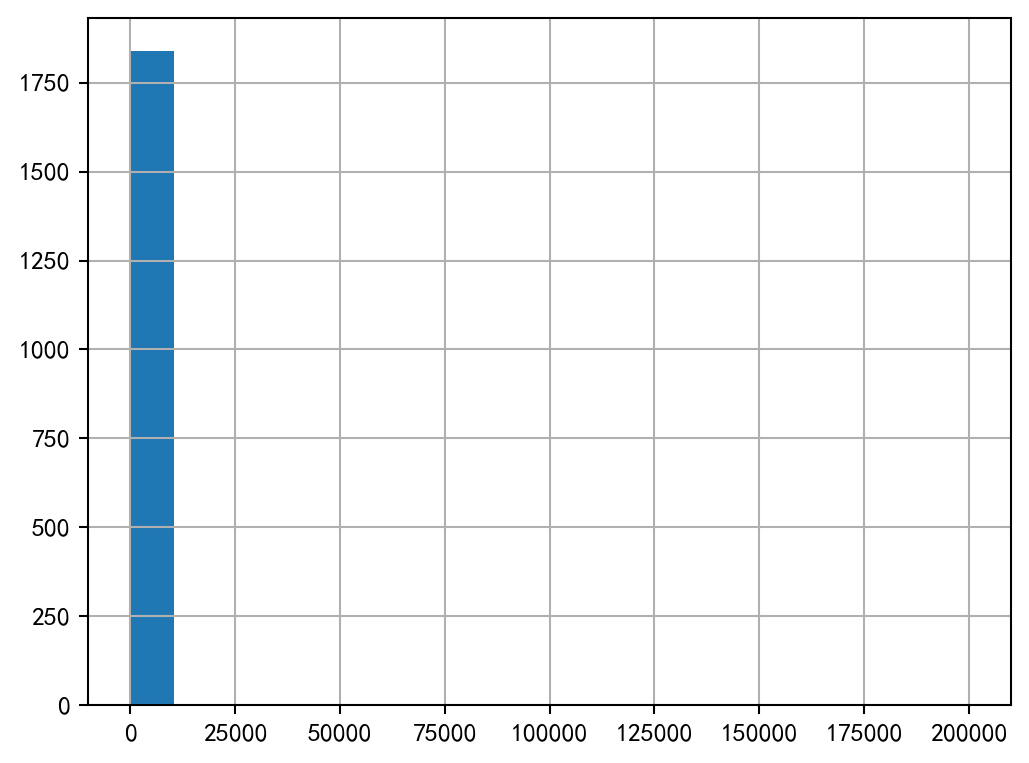

In [250]:
# 生成等距的分组区间
bins = np.linspace(start=0, stop=200000, num=20)
data['月销量'].hist(bins=bins)

<p><span style="font-size: 14pt;">各区段差距过大，可视化效果不佳，下面改为取对数</span></p>

<Axes: >

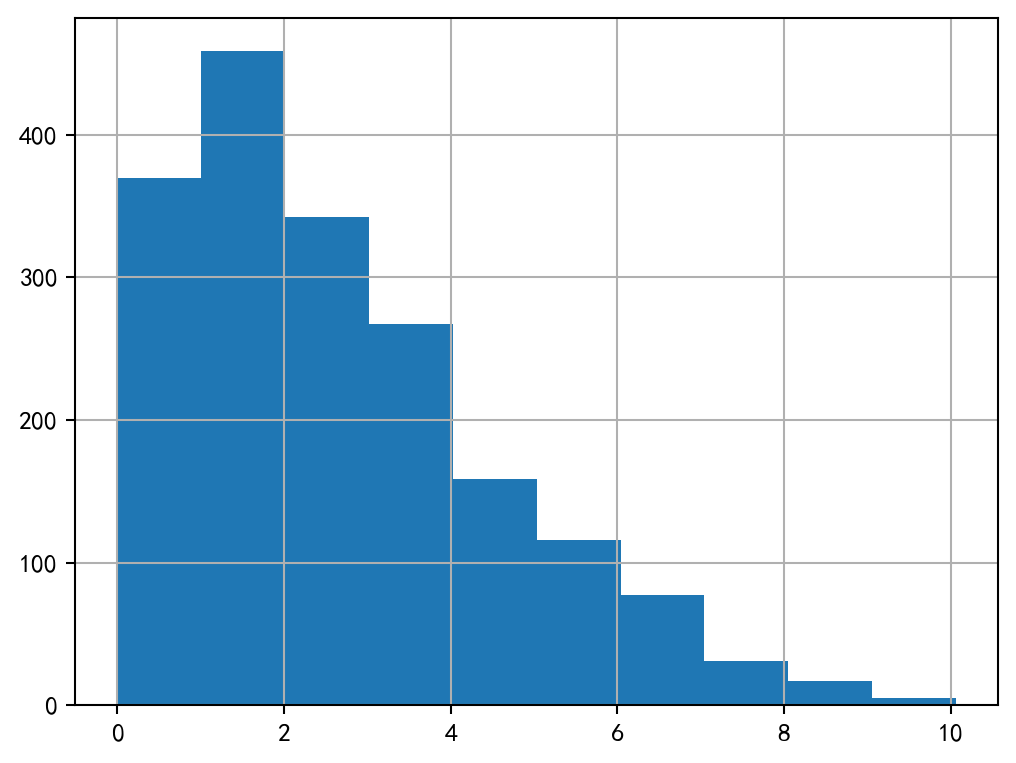

In [247]:
data['月销量_log'] = data['月销量'].apply(np.log1p)
data['月销量_log'].hist()

<Axes: >

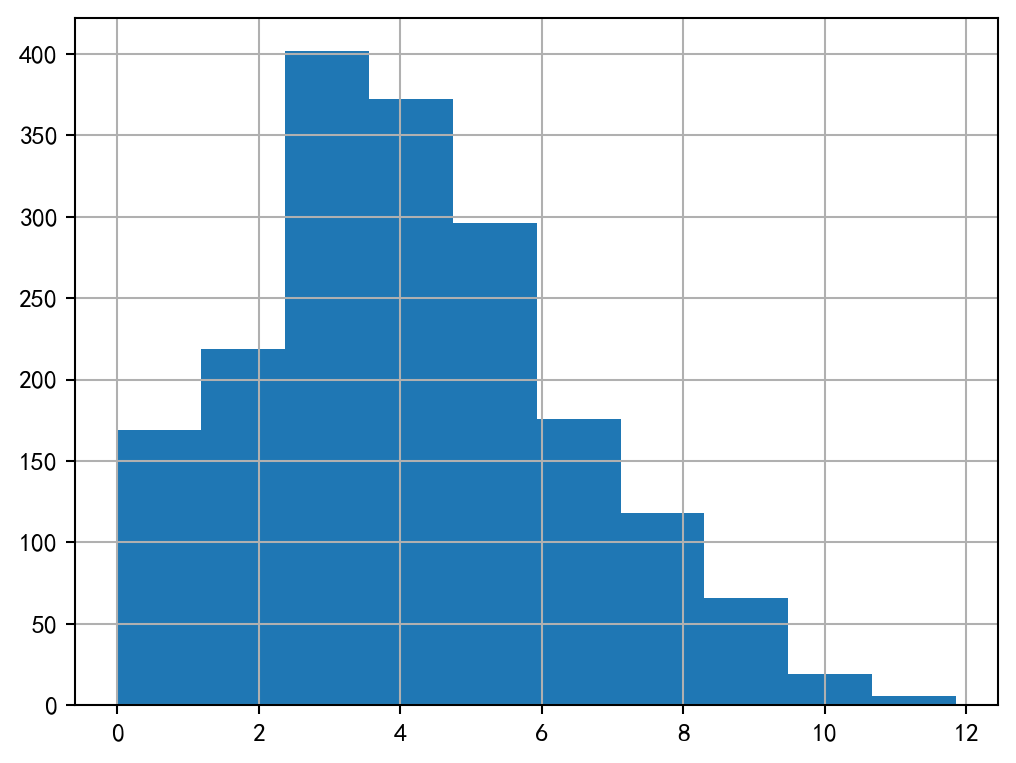

In [251]:
data['半年销量_log'] = data['半年销量'].apply(np.log1p)
data['半年销量_log'].hist()

<h3>定义箱线图函数</h3>

In [252]:
#自定义箱线图函数
def lei_boxplot(df, column,boxwidth,title,xlabel,ylabel):
    import math
    #将绘图所需数据列转变为列表元组
    tmp = df.reset_index()
    tmp = pd.pivot(tmp, index = 'index', columns = column)
    tmp_X = ()
    tmp_width = []
    for i in range(tmp.shape[1]):  #返回列数
        s = list(tmp.iloc[:,i].dropna())  #返回第i列所有非空值的值，形成列表
        tmp_X = tmp_X+(s,)  #列表变为元组
        tmp_width.append(len(s))  #得到列表s的长度
    #根据每列元素个数设置箱体宽度
    m = max(tmp_width)
    for i in range(len(tmp_width)):
        tmp_width[i] = math.sqrt(boxwidth*tmp_width[i]/m)
     
    #获取绘图所需标签列
    label = []
    for i in range(len(tmp.columns)):
        label.append(tmp.columns[i][1])
    #绘图
    plt.boxplot(tmp_X,labels = label, widths = tmp_width)
    plt.grid()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

<h3>店铺年龄对销量的影响</h3>

<h3>店铺评分对销量的影响</h3>

<h3>发货地对销量的影响</h3>

<h3>商品价格对销量的影响</h3>

<h3>关键词对销量的影响</h3>

<h2>（7）回归分析</h2>

<h1><span style="color: #b96ad9;">题二</span></h1>
<blockquote>
<p>Airbnb 新用户目的地预测（选做）</p>
</blockquote>